In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
#%pip install wordcloud

In [6]:
df = pd.read_csv('TREC_06.csv')

In [8]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Convert date column to datetime

In [9]:
# Table 1: Count of phishing vs. non-phishing emails
phish_counts = df['label'].value_counts()
print("Phishing Email Counts:\n", phish_counts)

Phishing Email Counts:
 0    8668
1    2803
Name: label, dtype: int64


/var/folders/_2/97vvhj716y1gb9rdp5lcq27m0000gn/T/ipykernel_38766/849534980.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phish_counts.index, y=phish_counts.values, palette=['blue', 'red'])


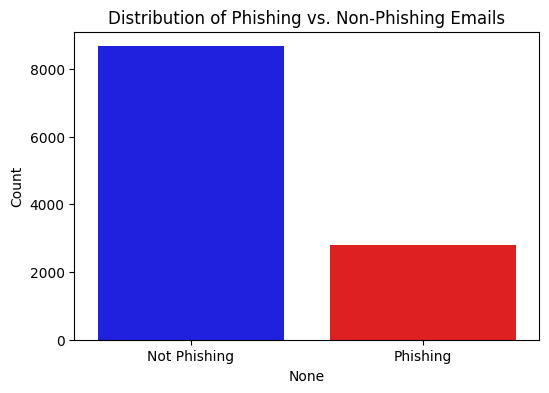

In [10]:
# Plot 1: Bar chart of phishing vs. non-phishing emails
plt.figure(figsize=(6, 4))
sns.barplot(x=phish_counts.index, y=phish_counts.values, palette=['blue', 'red'])
plt.xticks(ticks=[0, 1], labels=['Not Phishing', 'Phishing'])
plt.ylabel("Count")
plt.title("Distribution of Phishing vs. Non-Phishing Emails")
plt.show()

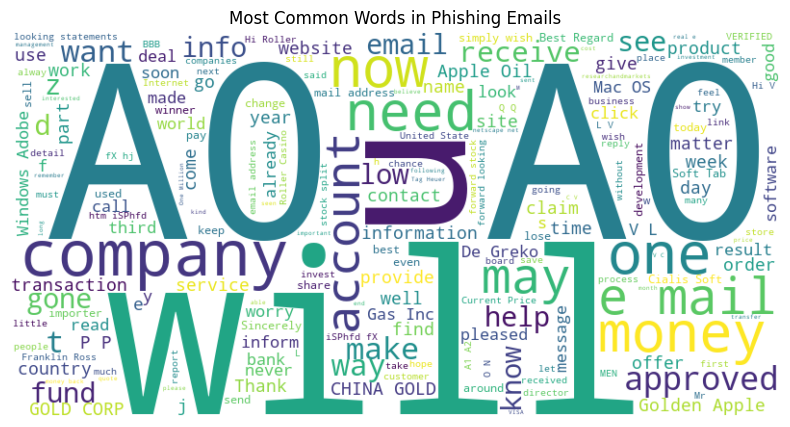

In [ ]:
# Plot 2: Word Cloud for phishing emails
phishing_text = " ".join(df[df['label'] == 1]['body'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(phishing_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Phishing Emails")
plt.show()

In [14]:
# Table 2: Count of emails containing URLs
url_counts = df['urls'].value_counts()
print("Emails Containing URLs:\n", url_counts)

Emails Containing URLs:
 0    7246
1    4225
Name: urls, dtype: int64


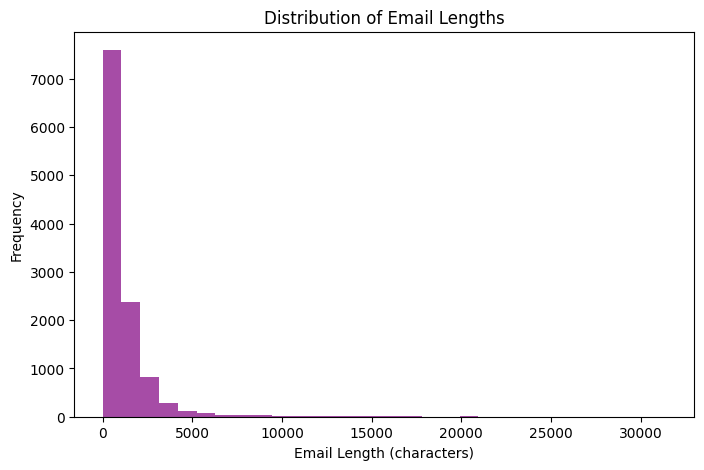

In [18]:
# Plot 3: Histogram of Email Lengths
df['email_length'] = df['body'].dropna().apply(len)
plt.figure(figsize=(8, 5))
plt.hist(df['email_length'], bins=30, color='purple', alpha=0.7)
plt.xlabel("Email Length (characters)")
plt.ylabel("Frequency")
plt.title("Distribution of Email Lengths")
plt.show()

/var/folders/_2/97vvhj716y1gb9rdp5lcq27m0000gn/T/ipykernel_38766/1565384925.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['label'], y=df['word_count'], palette=['blue', 'red'])


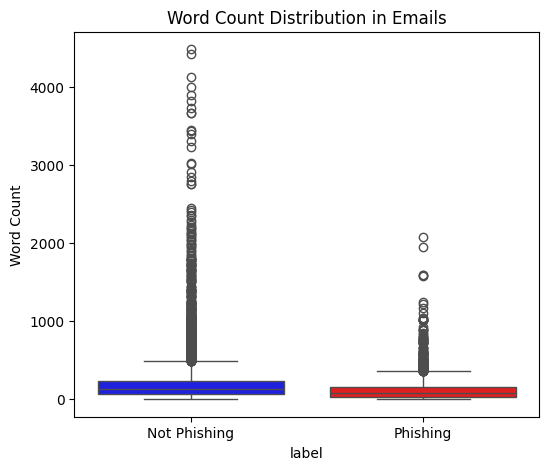

In [19]:
# Plot 4: Boxplot of Word Count in Phishing vs. Non-Phishing Emails
df['word_count'] = df['body'].dropna().apply(lambda x: len(x.split()))
plt.figure(figsize=(6, 5))
sns.boxplot(x=df['label'], y=df['word_count'], palette=['blue', 'red'])
plt.xticks(ticks=[0, 1], labels=['Not Phishing', 'Phishing'])
plt.ylabel("Word Count")
plt.title("Word Count Distribution in Emails")
plt.show()

/var/folders/_2/97vvhj716y1gb9rdp5lcq27m0000gn/T/ipykernel_38766/3389298162.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_phish_subjects.index, x=top_phish_subjects.values, palette='Reds_r')
/Users/chloe/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 40359 (\N{CJK UNIFIED IDEOGRAPH-9DA7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chloe/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24110 (\N{CJK UNIFIED IDEOGRAPH-5E2E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


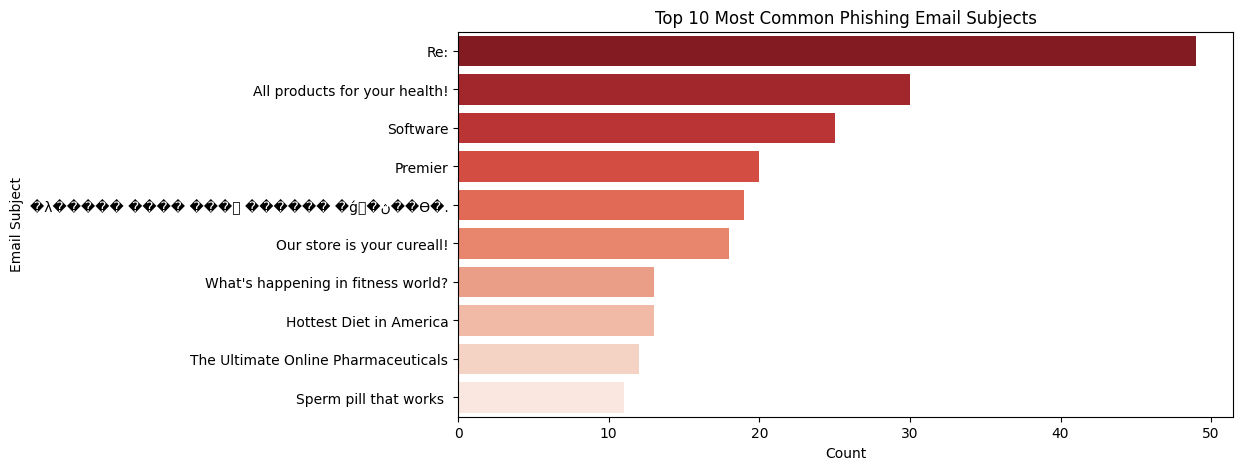

In [23]:
# Plot 5: Bar Chart of Most Common Email Subjects in Phishing Emails
top_phish_subjects = df[df['label'] == 1]['subject'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(y=top_phish_subjects.index, x=top_phish_subjects.values, palette='Reds_r')
plt.xlabel("Count")
plt.ylabel("Email Subject")
plt.title("Top 10 Most Common Phishing Email Subjects")
plt.show()